Step 1 : Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('/content/data_kaggle.xlsx')

In [4]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Size.1,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,Built-up,"1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area,6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),Built-up,"1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),Built-up,"1,513 sq. ft.",Partly Furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Size.1         52820 non-null  object 
 8   Furnishing     46953 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.7+ MB


In [6]:
data['Rooms'] = pd.to_numeric(data['Rooms'], errors='coerce')

In [7]:
data['Rooms'] = data['Rooms'].fillna(data['Rooms'].median())
data['Bathrooms'] = data['Bathrooms'].fillna(data['Bathrooms'].median())
data['Car Parks'] = data['Car Parks'].fillna(data['Car Parks'].median())

In [8]:
data['Property Type'] = data['Property Type'].fillna('Unknown')
data['Furnishing'] = data['Furnishing'].fillna('Unknown')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          53883 non-null  float64
 3   Bathrooms      53883 non-null  float64
 4   Car Parks      53883 non-null  float64
 5   Property Type  53883 non-null  object 
 6   Size           52820 non-null  object 
 7   Size.1         52820 non-null  object 
 8   Furnishing     53883 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.7+ MB


In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52611 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       52611 non-null  object 
 1   Price          52611 non-null  object 
 2   Rooms          52611 non-null  float64
 3   Bathrooms      52611 non-null  float64
 4   Car Parks      52611 non-null  float64
 5   Property Type  52611 non-null  object 
 6   Size           52611 non-null  object 
 7   Size.1         52611 non-null  object 
 8   Furnishing     52611 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.0+ MB


In [12]:
print(data.isnull().sum())

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Size             0
Size.1           0
Furnishing       0
dtype: int64


In [13]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Size.1,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",3.0,3.0,2.0,Serviced Residence,Built-up,"1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6.0,7.0,2.0,Bungalow,Land area,6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3.0,4.0,2.0,Condominium (Corner),Built-up,"1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",3.0,3.0,2.0,Condominium (Corner),Built-up,"1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",3.0,5.0,4.0,Bungalow,Land area,7200 sq. ft.,Partly Furnished


In [49]:
data['Price'] = data['Price'].astype(str)

In [50]:
data['Price'] = data['Price'].str.replace('RM', '').str.replace(',', '').str.strip()

In [51]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')


In [52]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Size.1,Furnishing,Price_per_sqft
0,"KLCC, Kuala Lumpur",NaN,3.0,3.0,2.0,Serviced Residence,NaN,NaN,Fully Furnished,NaN
1,"Damansara Heights, Kuala Lumpur",NaN,6.0,7.0,2.0,Bungalow,NaN,NaN,Partly Furnished,NaN
2,"Dutamas, Kuala Lumpur",NaN,3.0,4.0,2.0,Condominium (Corner),NaN,NaN,Partly Furnished,NaN
4,"Bukit Jalil, Kuala Lumpur",NaN,3.0,3.0,2.0,Condominium (Corner),NaN,NaN,Partly Furnished,NaN
5,"Taman Tun Dr Ismail, Kuala Lumpur",NaN,3.0,5.0,4.0,Bungalow,NaN,NaN,Partly Furnished,NaN


In [53]:
missing_data = data[data['Price'].isnull() | data['Size'].isnull()]
print(missing_data)

                                Location  Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC, Kuala Lumpur    NaN    3.0        3.0        2.0   
1        Damansara Heights, Kuala Lumpur    NaN    6.0        7.0        2.0   
2                  Dutamas, Kuala Lumpur    NaN    3.0        4.0        2.0   
4              Bukit Jalil, Kuala Lumpur    NaN    3.0        3.0        2.0   
5      Taman Tun Dr Ismail, Kuala Lumpur    NaN    3.0        5.0        4.0   
...                                  ...    ...    ...        ...        ...   
53878              Bangsar, Kuala Lumpur    NaN    3.0        4.0        2.0   
53879              Bangsar, Kuala Lumpur    NaN    5.0        4.0        2.0   
53880              Bangsar, Kuala Lumpur    NaN    3.0        4.0        2.0   
53881          Wangsa Maju, Kuala Lumpur    NaN    3.0        2.0        2.0   
53882              Setapak, Kuala Lumpur    NaN    4.0        2.0        3.0   

                    Property Type  Size

In [54]:
data = data.dropna(subset=['Price', 'Size'])

In [55]:
data['Price'].fillna(data['Price'].median(), inplace=True)
data['Size'].fillna(data['Size'].median(), inplace=True)

In [56]:
data['Price_per_sqft'] = data['Price'] / data['Size']

In [59]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Size.1,Furnishing,Price_per_sqft


In [39]:
data['Price_per_sqft'] = data['Price'] / data['Size.1']

In [40]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Size.1,Furnishing,Price_per_sqft
0,"KLCC, Kuala Lumpur",NaN,3.0,3.0,2.0,Serviced Residence,NaN,NaN,Fully Furnished,NaN
1,"Damansara Heights, Kuala Lumpur",NaN,6.0,7.0,2.0,Bungalow,NaN,NaN,Partly Furnished,NaN
2,"Dutamas, Kuala Lumpur",NaN,3.0,4.0,2.0,Condominium (Corner),NaN,NaN,Partly Furnished,NaN
4,"Bukit Jalil, Kuala Lumpur",NaN,3.0,3.0,2.0,Condominium (Corner),NaN,NaN,Partly Furnished,NaN
5,"Taman Tun Dr Ismail, Kuala Lumpur",NaN,3.0,5.0,4.0,Bungalow,NaN,NaN,Partly Furnished,NaN


In [14]:
len(data.Location.unique())

110

In [15]:
data.Location = data.Location.apply(lambda x: x.strip())

Location_stats = data.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
Location_stats

,Location
Location,
"Mont Kiara, Kuala Lumpur",5812
"KLCC, Kuala Lumpur",5136
"Cheras, Kuala Lumpur",4370
"Jalan Klang Lama (Old Klang Road), Kuala Lumpur",2786
"Setapak, Kuala Lumpur",2611
...,...
"Sungai Long SL8, Kuala Lumpur",1
"Kemensah, Kuala Lumpur",1
"TAMAN MELATI, Kuala Lumpur",1


In [16]:
len(Location_stats[Location_stats<=10])

49

In [17]:
Location_stats_less_than_10 = Location_stats[Location_stats<=10]
Location_stats_less_than_10

,Location
Location,
"Chan Sow Lin, Kuala Lumpur",10
"Bukit Kiara, Kuala Lumpur",9
"Gombak, Kuala Lumpur",9
"Bandar Sri Damansara, Kuala Lumpur",6
"Sri Damansara, Kuala Lumpur",3
"Taman Yarl, Kuala Lumpur",2
"Taman Sri Keramat, Kuala Lumpur",2
"ADIVA Desa ParkCity, Kuala Lumpur",2
"Happy Garden, Kuala Lumpur",2


In [18]:
len(data.Location.unique())

110

In [19]:
data.Location = data.Location.apply(lambda x: 'other' if x in Location_stats_less_than_10 else x)
len(data.Location.unique())

62

In [20]:
data.head(10)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Size.1,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",3.0,3.0,2.0,Serviced Residence,Built-up,"1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6.0,7.0,2.0,Bungalow,Land area,6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3.0,4.0,2.0,Condominium (Corner),Built-up,"1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",3.0,3.0,2.0,Condominium (Corner),Built-up,"1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",3.0,5.0,4.0,Bungalow,Land area,7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5.0,4.0,4.0,Semi-detached House,Land area,3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",3.0,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area,25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3.0,2.0,1.0,Apartment (Intermediate),Built-up,904 sq. ft.,Partly Furnished
11,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,680,000",4.0,3.0,2.0,2-sty Terrace/Link House (Intermediate),Land area,22 x 80 sq. ft.,Partly Furnished
12,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,700,000",3.0,3.0,2.0,2-sty Terrace/Link House (Intermediate),Land area,1900 sq. ft.,Partly Furnished


In [21]:
data.describe()

,Rooms,Bathrooms,Car Parks
count,52611.000000,52611.000000,52611.000000
mean,3.085686,3.043812,2.008762
std,0.960380,1.618347,1.081483
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,2.000000,2.000000
75%,3.000000,4.000000,2.000000
max,18.000000,20.000000,30.000000


In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1)
y = data['Price']

In [23]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
train_data = X_train.join(y_train, lsuffix='_left', rsuffix='_right')

In [25]:
train_data


,Location_left,Rooms_left,Bathrooms_left,Car Parks_left,Property Type_left,Size_left,Size.1_left,Furnishing_left,Location_right,Rooms_right,Bathrooms_right,Car Parks_right,Property Type_right,Size_right,Size.1_right,Furnishing_right
18327,"Ampang Hilir, Kuala Lumpur",3.0,2.0,2.0,Condominium,Built-up,"1,050 sq. ft.",Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36122,"Ampang Hilir, Kuala Lumpur",3.0,4.0,1.0,Condominium (Corner),Built-up,"2,750 sq. ft.",Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15723,"Sentul, Kuala Lumpur",2.0,1.0,1.0,Serviced Residence (EndLot),Built-up,650 sq. ft.,Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15926,"KLCC, Kuala Lumpur",1.0,2.0,2.0,Condominium (Corner),Built-up,"1,068 sq. ft.",Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183,"Desa ParkCity, Kuala Lumpur",3.0,4.0,2.0,3-sty Terrace/Link House (Intermediate),Land area,Kuala Lumpur sq. ft.,Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36020,"KLCC, Kuala Lumpur",3.0,3.0,2.0,Serviced Residence,Built-up,"2,098 sq. ft.",Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,"KLCC, Kuala Lumpur",3.0,3.0,2.0,Serviced Residence (Corner),Built-up,"1,668 sq. ft.",Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13053,"Jalan Kuching, Kuala Lumpur",3.0,2.0,1.0,Condominium (Corner),Built-up,"1,202 sq. ft.",Unfurnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19050,"Setiawangsa, Kuala Lumpur",3.0,2.0,2.0,Condominium,Built-up,"1,196 sq. ft.",Partly Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'Rooms_left'}>,
        <Axes: title={'center': 'Bathrooms_left'}>],
       [<Axes: title={'center': 'Car Parks_left'}>,
        <Axes: title={'center': 'Rooms_right'}>],
       [<Axes: title={'center': 'Bathrooms_right'}>,
        <Axes: title={'center': 'Car Parks_right'}>]], dtype=object)

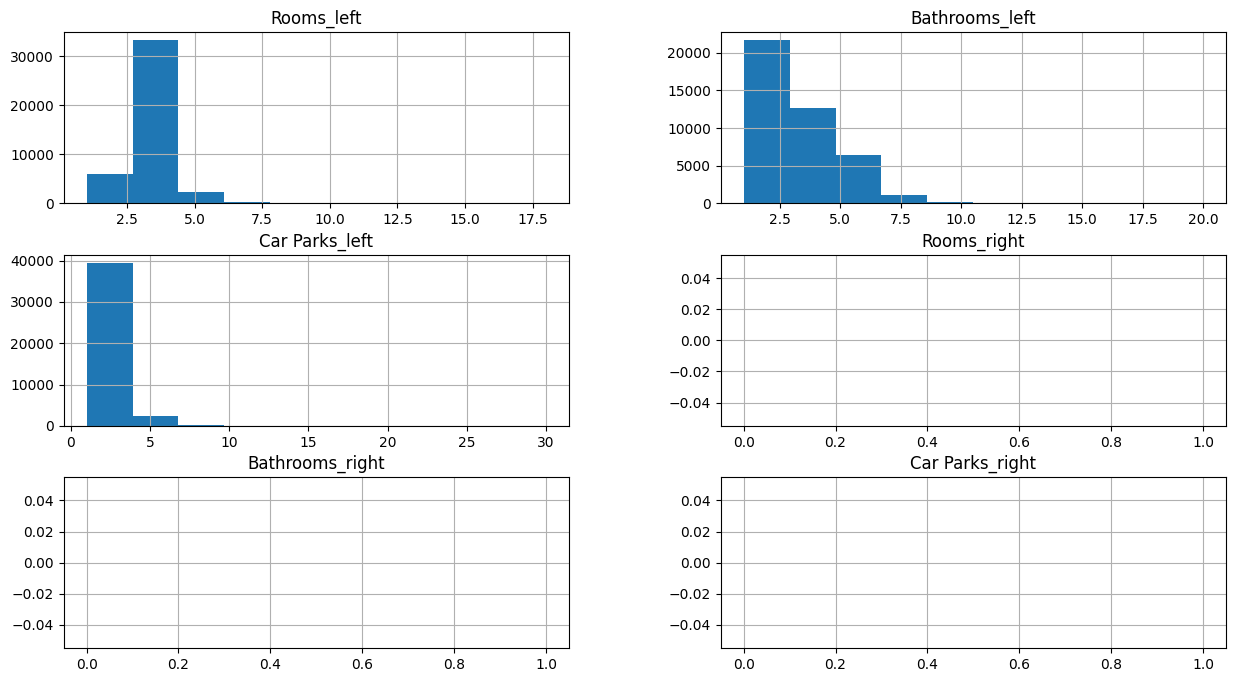

In [26]:
train_data.hist(figsize=(15,8))

In [27]:
numeric_data = train_data.select_dtypes(include=['number'])

In [28]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                 Rooms_left  Bathrooms_left  Car Parks_left  Rooms_right  \
Rooms_left         1.000000        0.444812        0.284254          NaN   
Bathrooms_left     0.444812        1.000000        0.493391          NaN   
Car Parks_left     0.284254        0.493391        1.000000          NaN   
Rooms_right             NaN             NaN             NaN          NaN   
Bathrooms_right         NaN             NaN             NaN          NaN   
Car Parks_right         NaN             NaN             NaN          NaN   

                 Bathrooms_right  Car Parks_right  
Rooms_left                   NaN              NaN  
Bathrooms_left               NaN              NaN  
Car Parks_left               NaN              NaN  
Rooms_right                  NaN              NaN  
Bathrooms_right              NaN              NaN  
Car Parks_right              NaN              NaN  


<Axes: >

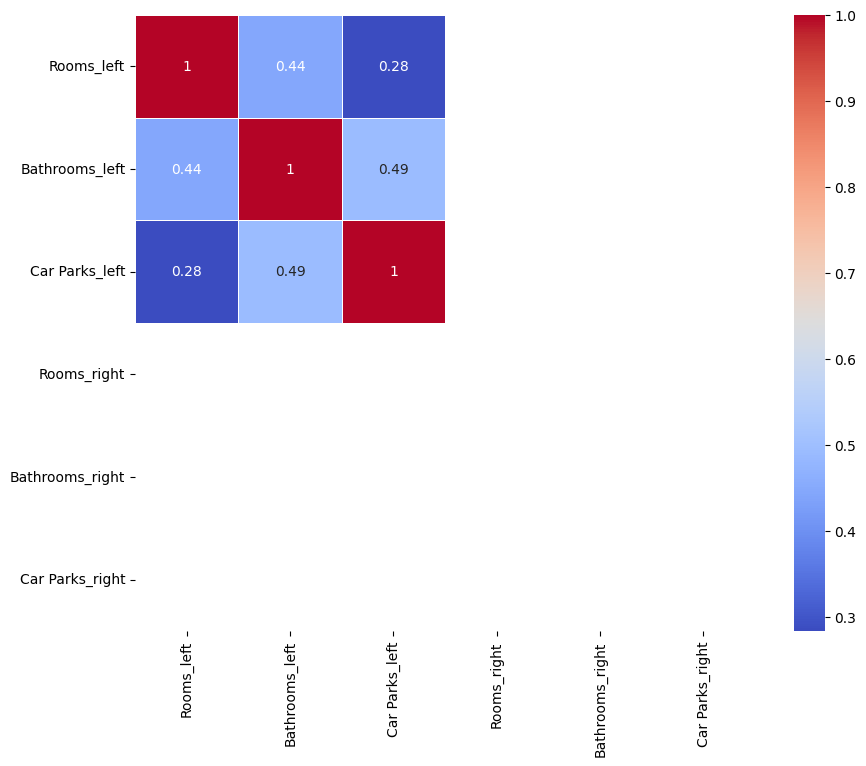

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [30]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)

KeyError: 'total_rooms'